## Text Classification

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

#vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('/kaggle/input/spamspam/spam.csv')

In [3]:
df.head()

,Category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df[df['Category']=='spam']['Message']

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: Message, Length: 747, dtype: object

In [5]:
no_spam = " ".join(df[df['Category']=='not spam']['Message'])
spam = " ".join(df[df['Category']=='spam']['Message'])

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='black', 
                      #stopwords = set(stopwords.words('english')), 
                      min_font_size = 10).generate(spam)

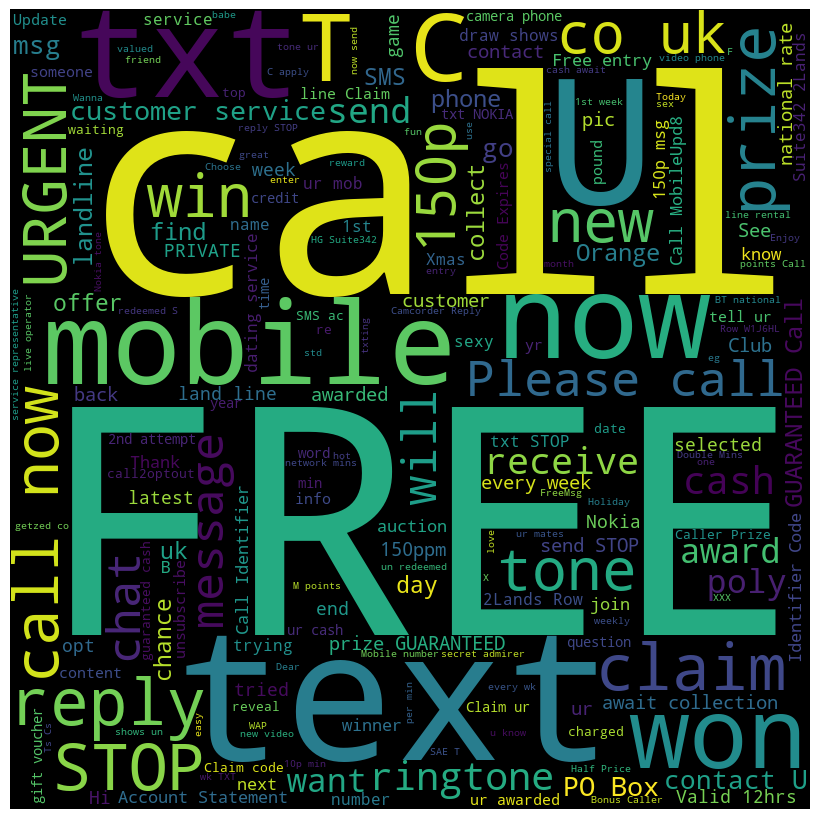

In [8]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

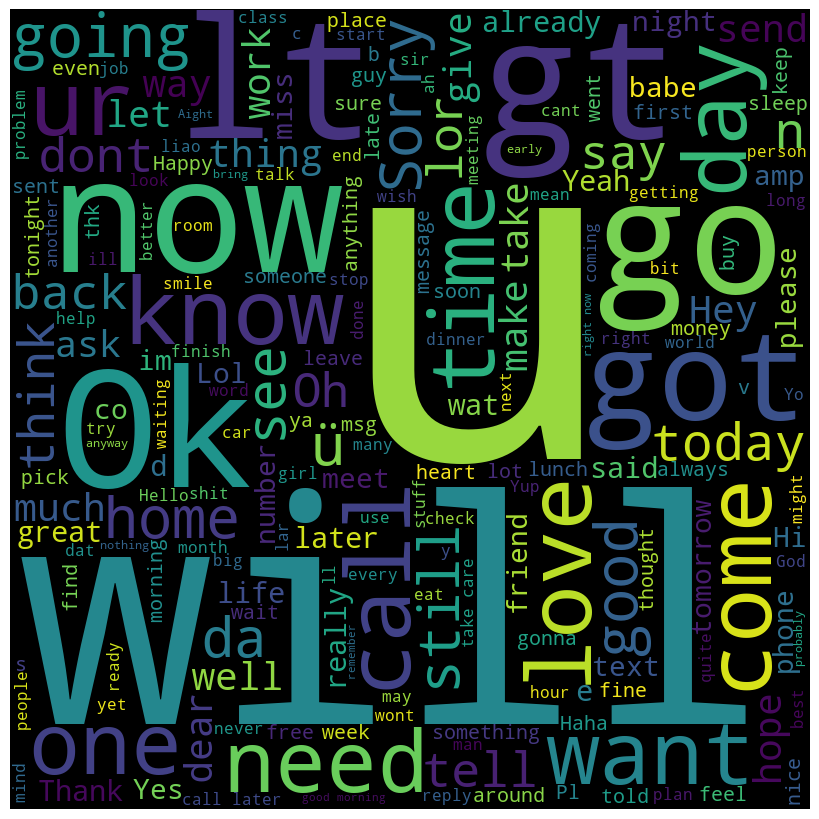

In [9]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='black', 
                      #stopwords = set(stopwords.words('english')), 
                      min_font_size = 10).generate(no_spam)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [10]:
x = df['Message']
y = df['Category']

In [11]:
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,test_size=.3,random_state=1)

In [13]:
cv = CountVectorizer(stop_words="english") 

xtrain_cv = cv.fit_transform(xtrain)
xtest_cv = cv.transform(xtest)

In [14]:
dt = DecisionTreeClassifier()
dt.fit(xtrain_cv,ytrain)

DecisionTreeClassifier()

In [15]:
ypred = dt.predict(xtest_cv)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1442
           1       0.91      0.87      0.89       230

    accuracy                           0.97      1672
   macro avg       0.94      0.93      0.94      1672
weighted avg       0.97      0.97      0.97      1672



In [16]:
# TF_IDF Vectorizer

tfidf = TfidfVectorizer(stop_words="english") 
xtrain_tfidf = tfidf.fit_transform(xtrain)
xtest_tfidf = tfidf.transform(xtest)

In [17]:
dt2 = DecisionTreeClassifier()
dt2.fit(xtrain_tfidf,ytrain)

DecisionTreeClassifier()

In [18]:
ypred = dt2.predict(xtest_tfidf)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1442
           1       0.89      0.82      0.85       230

    accuracy                           0.96      1672
   macro avg       0.93      0.90      0.92      1672
weighted avg       0.96      0.96      0.96      1672



## Prediction

In [19]:
sms1 = "Hey whatsup, let's hang out someday"
sms2 = "FREE iphone on purchase of 20000 rs in myshop.com, claim your reward"

In [20]:
def predict_sms(sms):
  sms_cv = cv.transform([sms])
  op = dt.predict(sms_cv)
  return le.inverse_transform(op)[0]

In [21]:
predict_sms(sms1)

'not spam'

In [22]:
predict_sms(sms2)

'spam'